In [14]:
library(librarian)
librarian::shelf(ggridges, 
                 dplyr, 
                 ggplot2, 
                 stringr, 
                 cowplot) 

In [2]:
aids_metrics <- read.csv("../datasets/results_df/AIDS_DCR_NNDR_comparison_results.csv")
wbcd_metrics <- read.csv("../datasets/results_df/WBCD_DCR_NNDR_comparison_results.csv")

colors <- read.csv("../color.csv", stringsAsFactors = FALSE)
rownames(colors) <- colors$type

aids_metrics[aids_metrics == "Reference"] <- "Original"
wbcd_metrics[wbcd_metrics == "Reference"] <- "Original"


axis_title_size <- 20
axis_text_size <- 20
legend_text_size <- 20
legend_title_size <- 20


cols = c(colors['original', 'color'],
         colors['avatar', 'color'],
         colors['synthpop', 'color'],
         colors['ctgan', 'color'])
color_names <- c('Original', 'Avatar', 'Synthpop', 'CT-GAN')
names(cols) <- color_names


In [3]:
get_dcr_plot <- function(df, xlim){
    dcr_plot <- ggplot(df, aes(x = dcr_values, y = type , fill = type)) +
    geom_boxplot(outlier.shape = NA) +
    scale_fill_manual(values = cols )+
    theme_bw() +
    ylab(NULL) +
    xlab("Distance to closest record") +
    coord_cartesian(xlim = xlim) +
    theme(text = element_text(size = 16), 
        strip.text.y.left = element_text(angle = 0),
        axis.text = element_text(size = axis_text_size, color = "black", family = "sans"),
        axis.title = element_text(size = axis_title_size, color = "black", family = "sans"),
        legend.position="none", 
        strip.text.y =  element_text(size = 11, color = "black", family = "sans"),
       )
    return(dcr_plot)
}

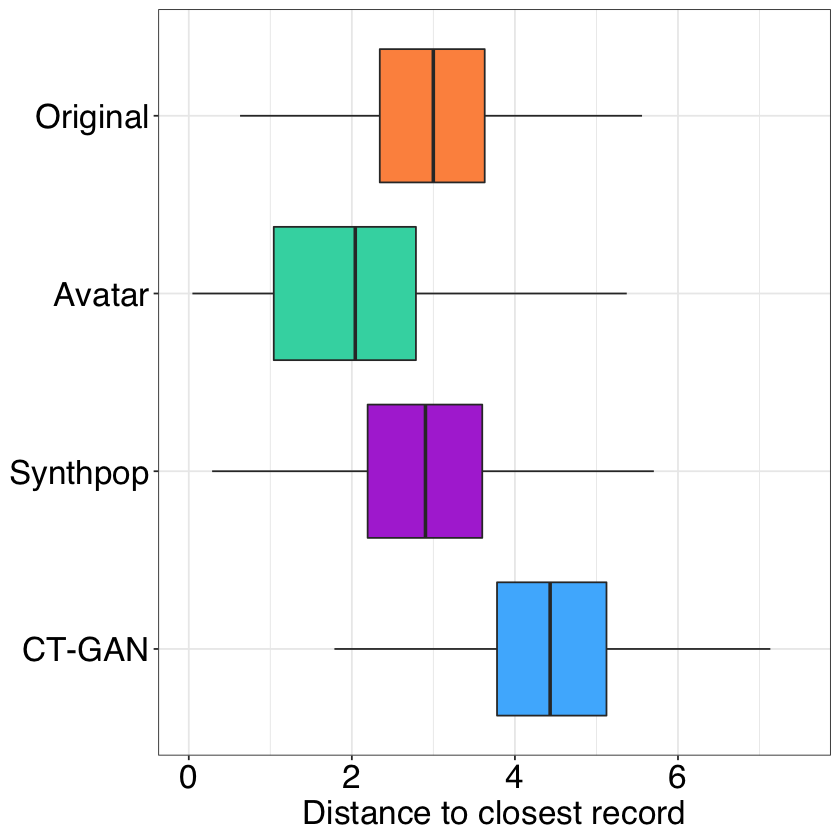

In [4]:
aids_metrics$type = factor(aids_metrics$type, levels=rev(color_names)) # order levels


aids_dcr_plot <- get_dcr_plot(aids_metrics, c(0, 7.5))
aids_dcr_plot

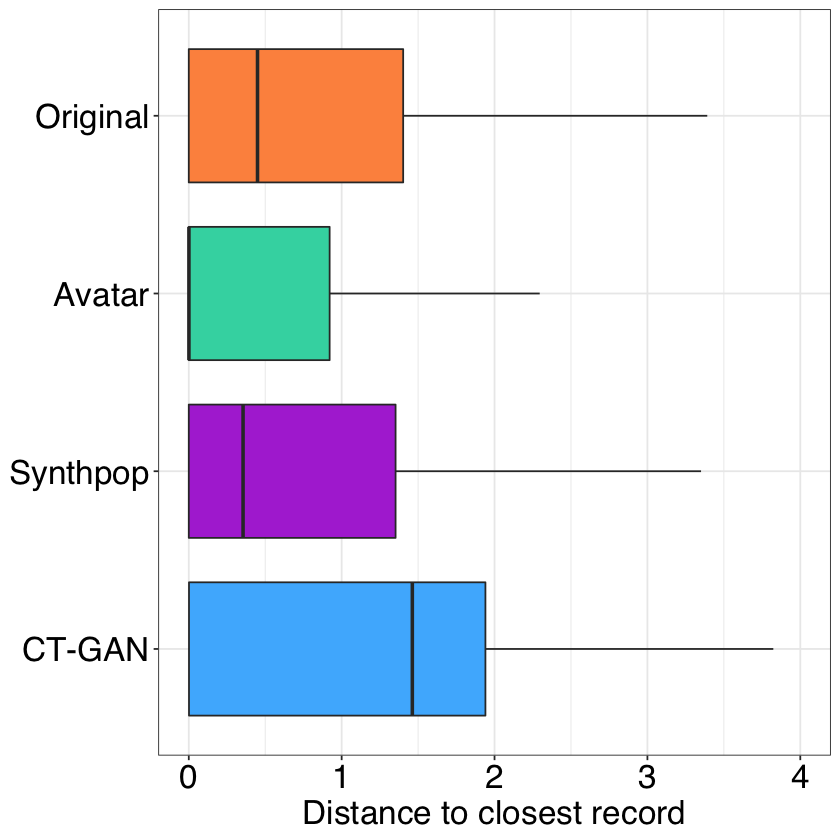

In [5]:
wbcd_metrics$type = factor(wbcd_metrics$type, levels=rev(color_names)) # order levels


wbcd_dcr_plot <-  get_dcr_plot(wbcd_metrics, c(0, 4))


wbcd_dcr_plot


In [6]:
get_nndr_plot <- function(df){
    dcr_plot <- ggplot(df, aes(x = nndr_values, y = type , fill = type)) +
    geom_boxplot(outlier.shape = NA) +
    scale_fill_manual(values = cols )+
    theme_bw() +
    ylab(NULL) +
    xlab("Nearest neighbors distance ratio") +
    coord_cartesian(xlim = c(0,1)) +
    theme(text = element_text(size = 16), 
        strip.text.y.left = element_text(angle = 0),
        axis.text = element_text(size = axis_text_size, color = "black", family = "sans"),
        axis.title = element_text(size = axis_title_size, color = "black", family = "sans"),
        legend.position="none", 
        strip.text.y =  element_text(size = 11, color = "black", family = "sans"),
       )
    return(dcr_plot)
}

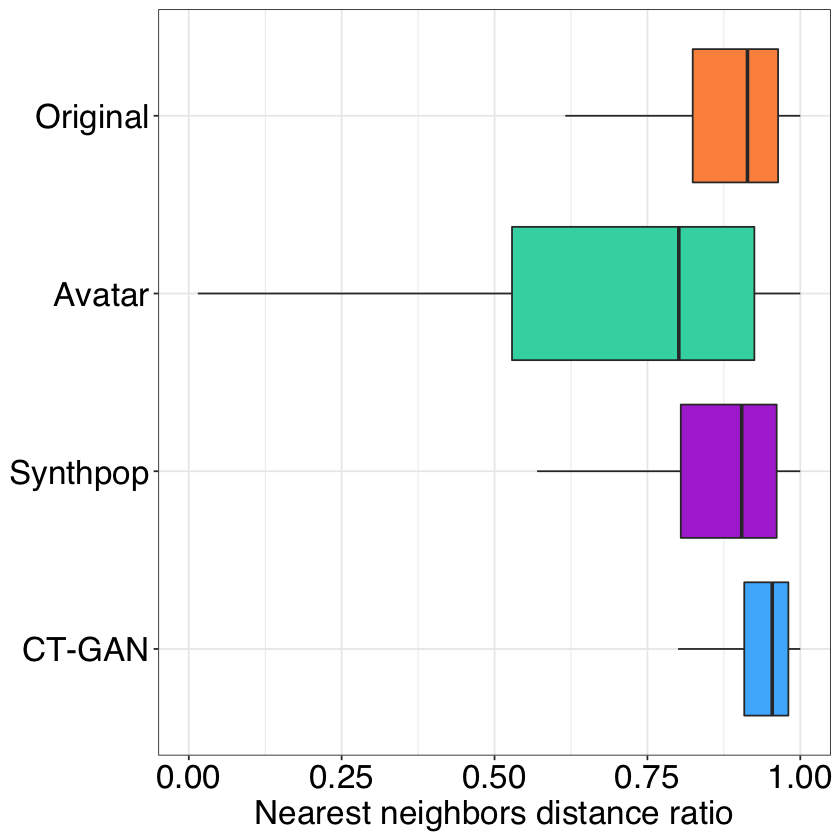

In [9]:
aids_nndr_plot <- get_nndr_plot(aids_metrics)
aids_nndr_plot

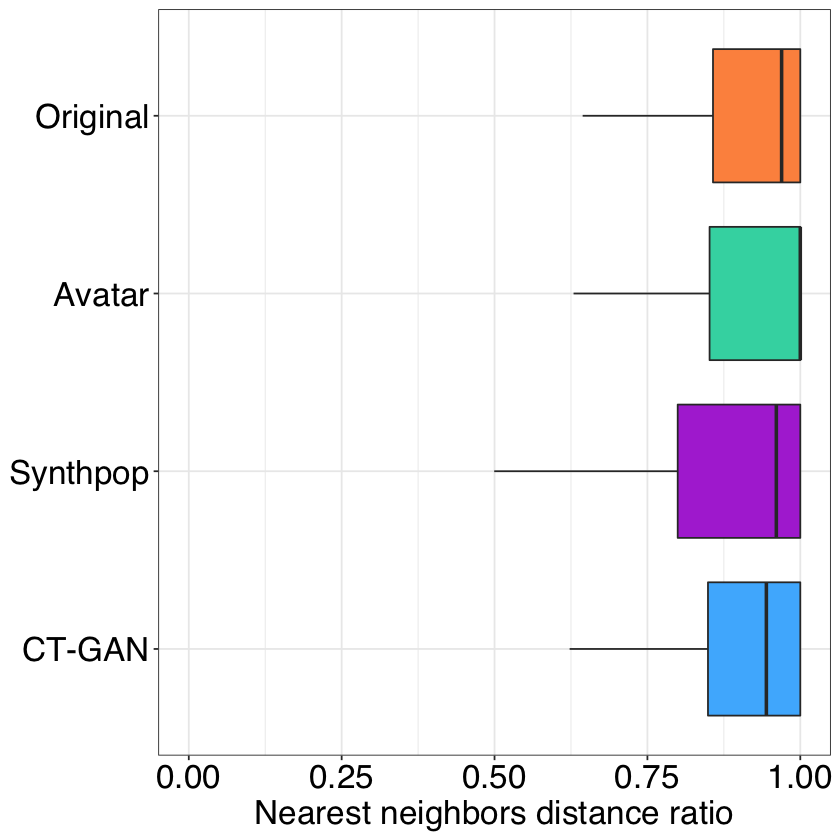

In [10]:
wbcd_nndr_plot <- get_nndr_plot(wbcd_metrics)
wbcd_nndr_plot

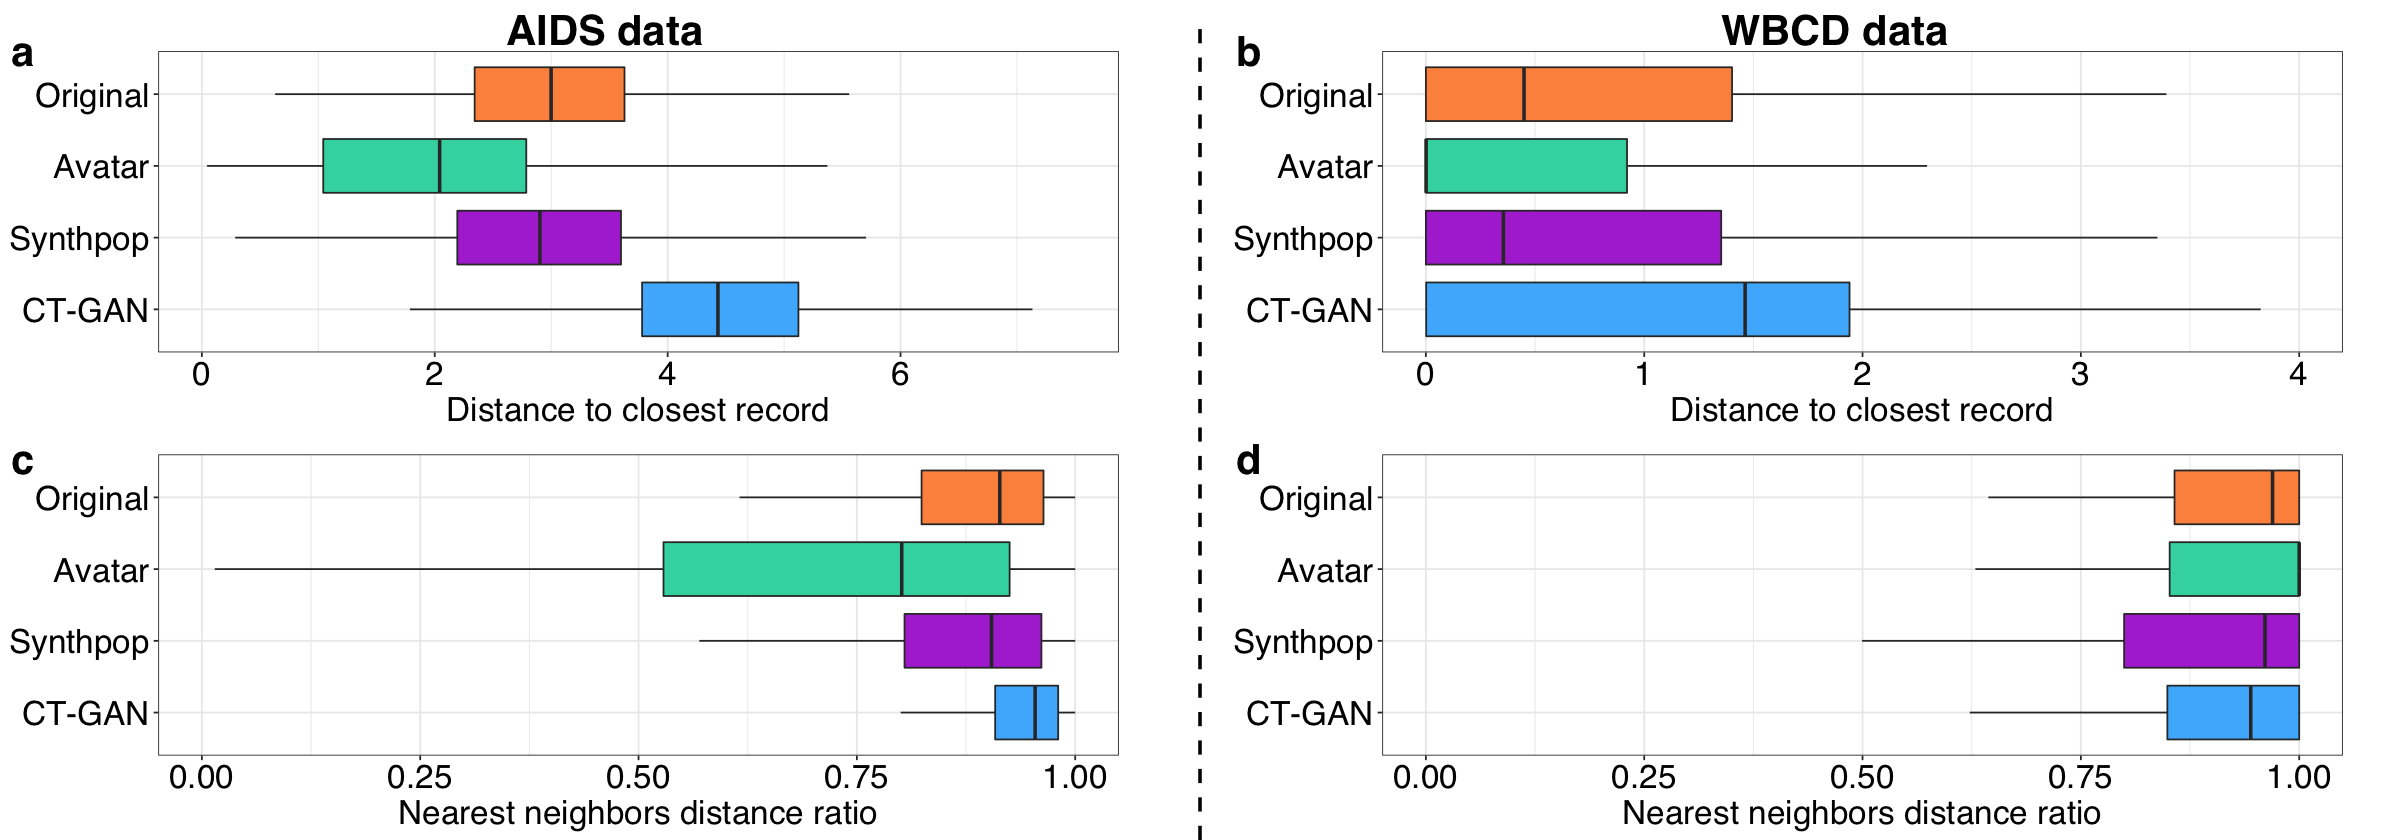

In [28]:
options(repr.plot.width = 20, repr.plot.height = 7)
privacy_comparison <- ggdraw() +
    draw_plot(aids_dcr_plot, x = 0, y = 0.48, width = 0.47, height = 0.47) +
    draw_plot(wbcd_dcr_plot, x = 0.51, y = 0.48, width = 0.47, height = 0.47) +
    draw_plot(aids_nndr_plot, x = 0, y = 0, width = 0.47, height = 0.47) +
    draw_plot(wbcd_nndr_plot, x = 0.51, y = 0, width = 0.47, height = 0.47) +
    draw_plot_label(label = c("a", "b", "c", "d", "AIDS data", "WBCD data"), size = 25, family = "sans",
                    x = c(0, 0.51, 0, 0.51, 0.17, 0.67), y = c(0.975, 0.975, 0.49, 0.49, 1, 1)) +
    draw_line(x = c(0.5, 0.5), y = c(0, 0.98), color = "black", size = 1, lty = 2)
privacy_comparison

ggsave2(file="../figures/suppl_privacy_comparison.svg", plot = privacy_comparison, width = 20, height = 14, dpi = 320)